<h1 align='center'>Data Science Analysis Assignment 3</h1>
<h2 align='center'>Pushkal Mishra</h2>
<h2 align='center'>EE20BTECH11042</h2>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import astroML
from astroML.stats import median_sigmaG
from astroML.resample import bootstrap

# Question 1

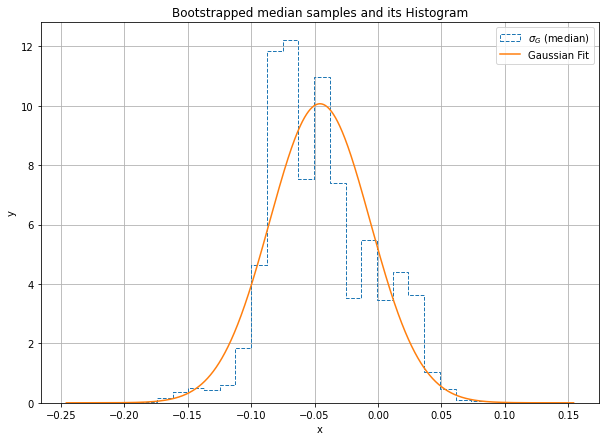

In [2]:
gauss_samples = 1000
gauss_data = norm(0, 1).rvs(gauss_samples)

bootstrap_samples = 10000
median, sigmaG = bootstrap(data = gauss_data, n_bootstraps = bootstrap_samples,
                          user_statistic = median_sigmaG, kwargs = dict(axis = 1))

mean = np.mean(median)
sigma = np.sqrt(np.pi / (2.0 * gauss_samples))
x = np.linspace(mean - 0.2, mean + 0.2, 10000)
pdf_samples = norm(mean, sigma).pdf(x)

fig = plt.figure(figsize = (10, 7))
plt.hist(median, bins = 25, density = True,histtype = 'step', ls = 'dashed', 
         label = r"$\sigma_G\ {\rm (median)}$")
plt.plot(x, pdf_samples, label = "Gaussian Fit")
plt.title("Bootstrapped median samples and its Histogram")
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(-0.25, 0.25)
plt.legend()
plt.grid()
plt.show()

# Question 2

In [3]:
def calculate_value(x, m, b):
    return m * x + b

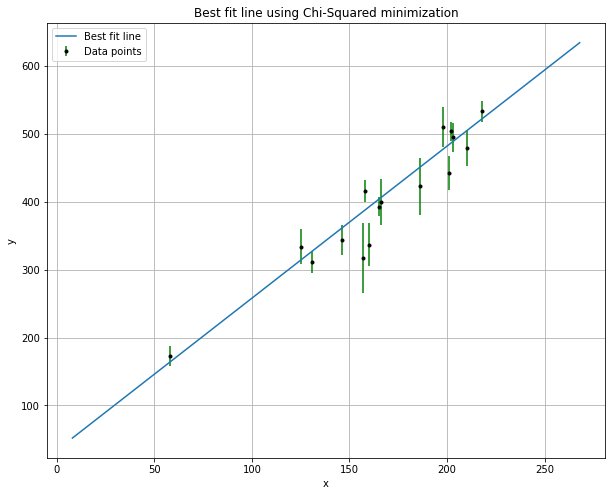

In [4]:
array = np.loadtxt("data.csv", delimiter = " ", dtype = str)

x = []
y = []
sigma_y = []

for lst in array:
    x.append(float(lst[1]))
    y.append(float(lst[2]))
    sigma_y.append(float(lst[3]))

x = np.array(x)
y = np.array(y)
sigma_y = np.array(sigma_y)

best_fit_params, covariance = curve_fit(f = calculate_value, 
                                        xdata = x, ydata = y, sigma = sigma_y)

predicted_m = best_fit_params[0]
predicted_b = best_fit_params[1]

x_test = np.linspace(min(x) - 50, max(x) + 50, 10000)
y_test = predicted_m * x_test + predicted_b

fig = plt.figure(figsize = (10, 8))
plt.errorbar(x, y, sigma_y, fmt = ".k", ecolor = "green", label = "Data points")
plt.plot(x_test, y_test, label = "Best fit line")
plt.title("Best fit line using Chi-Squared minimization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Question 3

In [5]:
N = 50
dof = N - 1

chi2_dof = np.array([0.96, 0.24, 3.84, 2.85])
chi2 = chi2_dof * dof

p_value = stats.chi2(dof).sf(chi2)

for i in range(4):
    print(f"Chi-Square value for Plot {i + 1}: {chi2[i]}")
    print(f"p-value for Plot {i + 1}: {p_value[i]}\n")

Chi-Square value for Plot 1: 47.04
p-value for Plot 1: 0.5529264339960217

Chi-Square value for Plot 2: 11.76
p-value for Plot 2: 0.9999999917009567

Chi-Square value for Plot 3: 188.16
p-value for Plot 3: 3.477504685373815e-18

Chi-Square value for Plot 4: 139.65
p-value for Plot 4: 1.2107295923765585e-10

